### <h1><center> Climate Change - EDA </center></h1>

In this notebook we are going to do some data cleaning and data exploring with the climate change dataset (https://data.worldbank.org/topic/climate-change).  

<h2><center> Data Cleaning </center></h2>

In [1]:
# Import the libraries
import calendar
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the climate dataset and store it in a dataframe
raw_climate = pd.read_excel('data\API_19_DS2_en_excel_v2_2921921.xls', skiprows = 3).drop(columns = ['Indicator Code'])
raw_climate

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),50.776,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,29246.000000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),NaN,2.206183,1.404498,0.788835,0.551271,0.544810,0.569216,...,0.100461,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,57702.000000,...,102050.000000,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),NaN,2.236462,1.432843,0.823502,0.580334,0.573498,0.599694,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),NaN,4.872690,5.001939,5.131188,5.260437,5.337986,5.518935,...,10.856921,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),NaN,28.396019,28.615743,28.835466,29.055189,29.223213,29.494636,...,42.393693,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN


The function below subsets all the data and makes it a usable dataframe out of it to make plots from. The columns that are selected, are derived from https://data.worldbank.org/topic/climate-change as well. These are the columns which I found interesting, but if there are others to be included in the dataframe, feel free to modify the function as bit!

In [3]:
def clean_climate_data(df: pd.DataFrame):
    
    """
    Function to clean the climate dataset
    """
    
    pivot_df: pd.DataFrame 
    clean_df: pd.DataFrame
    
    years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', 
             '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', 
             '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', 
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] # Include all the years of the dataframe
    
    
    variables = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'Electric power consumption (kWh per capita)', 
             'Energy use (kg of oil equivalent per capita)', 'Methane emissions (kt of CO2 equivalent)',
            'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Population growth (annual %)', 
                 'Population, total', 'Renewable electricity output (% of total electricity output)', 
                 'Renewable energy consumption (% of total final energy consumption)', 
                 'Total greenhouse gas emissions (kt of CO2 equivalent)'] # The applicable columns that are included
    
    rename = {'CO2 emissions (metric tons per capita)':'CO2 emissions (per capita)', 
              'Electric power consumption (kWh per capita)':'Electric consumption (per capita)', 
             'Energy use (kg of oil equivalent per capita)':'Energy use (per capita)', 
              'Methane emissions (kt of CO2 equivalent)':'Methane emissions (kt)',
            'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)':'Nitrous emissions (tons)', 
              'Population growth (annual %)':'Population grown (annual)', 
        'Population, total':'Total population', 
              'Renewable energy consumption (% of total final energy consumption)':'Renewable energy consumption (% of total energy consumption)', 
            'Total greenhouse gas emissions (kt of CO2 equivalent)':'Greenhouse gas emissions (kt)'} # Renamed columns
    
    df = pd.melt(df, id_vars = ['Country Code', 'Indicator Name'], value_vars = years).rename(columns={"Indicator Name": "column", "variable": "Year"}, errors="raise")
    df['Year'] = df['Year'].apply(np.int64)
    df.set_index(['Country Code', 'Year'], inplace = True)
    
    pivot_df = df.groupby(['Country Code', 'Year', 'column'])['value'].sum().unstack('column') # Make a pivot table out of it
    pivot_df = pivot_df[variables] # Subset the columns based on the variables above
    pivot_df = pivot_df.rename(columns = rename) # Rename the columns with long name 
    pivot_df = pivot_df.iloc[pivot_df.index.get_level_values('Year') > 1991] # Exclude the years before 1991
    pivot_df = pivot_df.iloc[pivot_df.index.get_level_values('Year') < 2019] # Exclude the years before 2019
    return pivot_df

In [4]:
climate = clean_climate_data(raw_climate)
climate

column             CO2 emissions (kt)  CO2 emissions (per capita)  \
Country Code Year                                                   
ABW          1992                 0.0                    0.000000   
             1993                 0.0                    0.000000   
             1994                 0.0                    0.000000   
             1995                 0.0                    0.000000   
             1996                 0.0                    0.000000   
...                               ...                         ...   
ZWE          2014             12150.0                    0.894256   
             2015             12400.0                    0.897598   
             2016             10990.0                    0.783303   
             2017             10230.0                    0.718570   
             2018             12270.0                    0.849793   

column             Electric consumption (per capita)  Energy use (per capita)  \
Country Code Year                                                               
ABW          1992                           0.000000                      0.0   
             1993                           0.000000                      0.0   
             1994                           0.000000                      0.0   
             1995                           0.000000                      0.0   
             1996                           0.000000                      0.0   
...                                              ...                      ...   
ZWE          2014                         609.124652                      0.0   
             2015                           0.000000                      0.0   
             2016                           0.000000                      0.0   
             2017                           0.000000                      0.0   
             2018                           0.000000                      0.0   

column             Methane emissions (kt)  Nitrous emissions (tons)  \
Country Code Year                                                     
ABW          1992                     0.0                       0.0   
             1993                     0.0                       0.0   
             1994                     0.0                       0.0   
             1995                     0.0                       0.0   
             1996                     0.0                       0.0   
...                                   ...                       ...   
ZWE          2014                 10820.0                    5840.0   
             2015                 11790.0                    6490.0   
             2016                 11380.0                    6090.0   
             2017                 11560.0                    6280.0   
             2018                 11850.0                    6470.0   

column             Population grown (annual)  Total population  \
Country Code Year                                                
ABW          1992                   5.446052           68240.0   
             1993                   6.048669           72495.0   
             1994                   5.644930           76705.0   
             1995                   4.610156           80324.0   
             1996                   3.531110           83211.0   
...                                      ...               ...   
ZWE          2014                   1.754741        13586710.0   
             2015                   1.663694        13814642.0   
             2016                   1.549294        14030338.0   
             2017                   1.459406        14236599.0   
             2018                   1.410382        14438812.0   

column             Renewable electricity output (% of total electricity output)  \
Country Code Year                                                                 
ABW          1992                                           0.000000              
             199

In [5]:
climate.dtypes

column
CO2 emissions (kt)                                              float64
CO2 emissions (per capita)                                      float64
Electric consumption (per capita)                               float64
Energy use (per capita)                                         float64
Methane emissions (kt)                                          float64
Nitrous emissions (tons)                                        float64
Population grown (annual)                                       float64
Total population                                                float64
Renewable electricity output (% of total electricity output)    float64
Renewable energy consumption (% of total energy consumption)    float64
Greenhouse gas emissions (kt)                                   float64
dtype: object

In [6]:
# load the UN speech dataset
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = r"./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), "rb")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], bytes.decode(f.read())])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','Country Code','Speech'])

df_speech = df_speech.set_index([df_speech["Country Code"], df_speech["Year"]])
df_speech

,,Session,Year,Country Code,Speech
Country Code,Year,,,,
ALB,1970,25,1970,ALB,33: May I first convey to our President the co...
ARG,1970,25,1970,ARG,177.\t : It is a fortunate coincidence that pr...
AUS,1970,25,1970,AUS,100.\t It is a pleasure for me to extend to y...
AUT,1970,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
BEL,1970,25,1970,BEL,"176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...
WSM,2020,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
YEM,2020,75,2020,YEM,In the name of God the Merciful and the Compas...
ZAF,2020,75,2020,ZAF,"President of the General Assembly, Secretary-G..."


In [7]:
df_speech["word frequency"] = df_speech["Speech"].str.lower().str.count("co2")+df_speech["Speech"].str.lower().str.count("carbon")+df_speech["Speech"].str.lower().str.count("climate")+df_speech["Speech"].str.lower().str.count("global warming")+df_speech["Speech"].str.lower().str.count("gas")+df_speech["Speech"].str.lower().str.count("green")+df_speech["Speech"].str.lower().str.count("sustainable")+df_speech["Speech"].str.lower().str.count("kyoto protocol")+df_speech["Speech"].str.lower().str.count("pollution")
df_speech["word frequency"]

Country Code  Year
ALB           1970     0
ARG           1970     0
AUS           1970     4
AUT           1970     0
BEL           1970     0
                      ..
WSM           2020    14
YEM           2020     1
ZAF           2020     6
ZMB           2020     2
ZWE           2020     8
Name: word frequency, Length: 8481, dtype: int64

<h2><center> EDA - Netherlands </center></h2>

In this section we are just going to make some plots and derive what we can see from it. 

In [8]:
# Subset the Netherlands from the climate data 
netherlands = climate.iloc[climate.index.get_level_values('Country Code') == 'NLD']
netherlands = netherlands.reset_index()
netherlands = netherlands.replace(0, netherlands.mean()) # Fill in the 0 values with the mean value 
netherlands

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


column,Country Code,Year,CO2 emissions (kt),CO2 emissions (per capita),Electric consumption (per capita),Energy use (per capita),Methane emissions (kt),Nitrous emissions (tons),Population grown (annual),Total population,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total energy consumption),Greenhouse gas emissions (kt)
0,NLD,1992,153260.0,10.093409,5441.655472,4502.540080,31560.0,15670.0,0.756057,15184166.0,1.287909,1.213753,208700.0
1,NLD,1993,158270.0,10.350961,5494.112372,4510.582152,30980.0,16050.0,0.696991,15290368.0,1.434700,1.212133,214220.0
2,NLD,1994,157420.0,10.233482,5643.106948,4511.794963,30250.0,15760.0,0.602938,15382838.0,1.575119,1.264591,213960.0
3,NLD,1995,164340.0,10.630696,5719.061109,4780.412596,29630.0,15390.0,0.493927,15459006.0,1.730999,1.277068,219360.0
4,NLD,1996,173920.0,11.198611,5905.992197,5014.988830,28990.0,15330.0,0.461396,15530498.0,2.125891,1.287317,230290.0
5,NLD,1997,166480.0,10.664514,6066.243238,4835.741945,27530.0,15070.0,0.514767,15610650.0,2.331172,1.507533,221490.0
6,NLD,1998,166920.0,10.626968,6257.890883,4842.443938,26590.0,14750.0,0.616641,15707209.0,2.555013,1.570518,221620.0
7,NLD,1999,161640.0,10.222559,6349.319584,4730.229683,25500.0,14500.0,0.665493,15812088.0,2.890913,1.654094,209170.0
8,NLD,2000,162300.0,10.191194,6507.105925,4739.065925,24400.0,14040.0,0.714770,15925513.0,3.315817,1.730700,207110.0
9,NLD,2001,167400.0,10.432390,6599.265370,4839.465530,23760.0,13390.0,0.754840,16046180.0,3.525405,1.763300,208170.0


In [9]:
netherlands.describe()

column,Year,CO2 emissions (kt),CO2 emissions (per capita),Electric consumption (per capita),Energy use (per capita),Methane emissions (kt),Nitrous emissions (tons),Population grown (annual),Total population,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total energy consumption),Greenhouse gas emissions (kt)
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,2005.000000,162308.518519,10.006685,6370.891054,4697.424767,22719.259259,11694.444444,0.496495,1.624793e+07,5.987745,3.236345,201915.925926
std,7.937254,6390.315812,0.608447,614.230357,270.945768,4509.663066,3216.849071,0.162853,5.964595e+05,3.717635,1.875486,13825.515781
min,1992.000000,149890.000000,8.772824,5441.655472,4227.682290,17260.000000,7790.000000,0.160614,1.518417e+07,1.287909,1.212133,178640.000000
25%,1998.500000,157815.000000,9.459257,5681.084029,4511.188557,19150.000000,8170.000000,0.379674,1.575965e+07,2.722963,1.612306,188610.000000
50%,2005.000000,162300.000000,10.191194,6599.265370,4739.065925,20190.000000,12830.000000,0.512923,1.631987e+07,5.388971,2.741700,203580.000000
75%,2011.500000,167160.000000,10.402297,6879.779987,4891.079943,26045.000000,14625.000000,0.609790,1.672402e+07,9.124852,4.795800,209200.000000
max,2018.000000,173920.000000,11.198611,7173.046299,5085.885701,31560.000000,16050.000000,0.756057,1.723162e+07,12.442082,7.383700,230290.000000


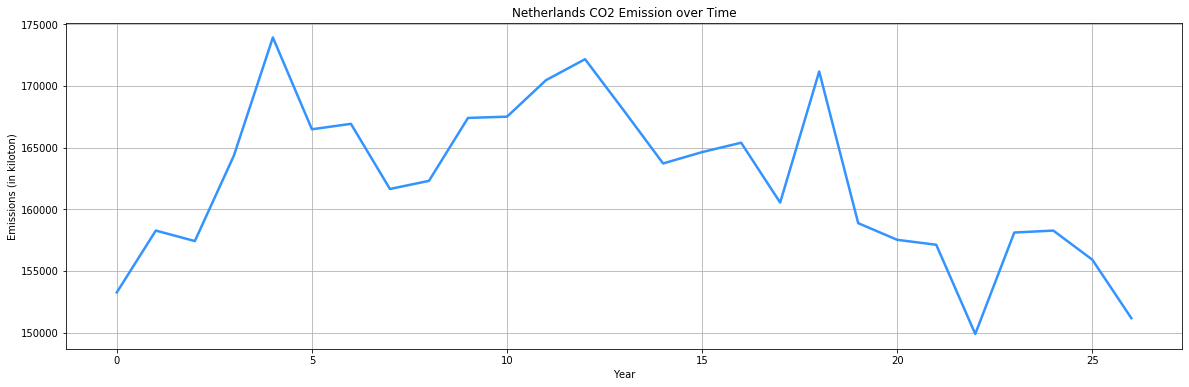

In [10]:
fig, ax = plt.subplots(figsize = (20, 6))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(netherlands["CO2 emissions (kt)"], color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel = 'Year', ylabel = 'Emissions (in kiloton)',
       title='Netherlands CO2 Emission over Time')

# Enable grid
ax.grid()

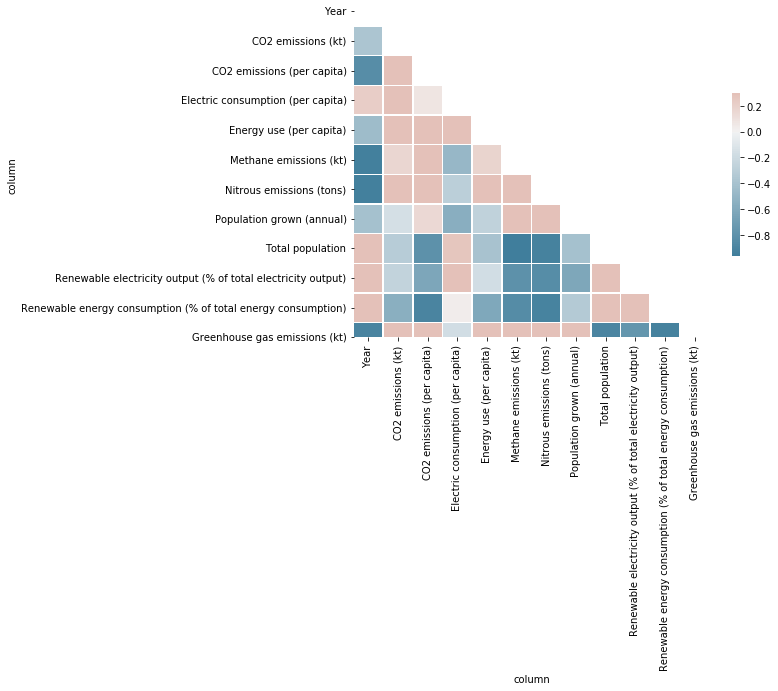

In [11]:
# Compute the correlation matrix
corr = netherlands.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

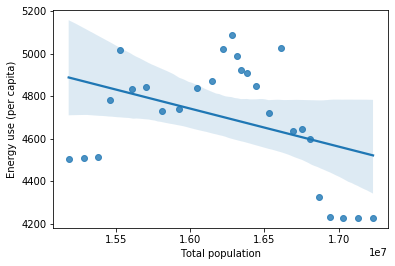

In [12]:
sns.regplot(x = "Total population", y = "Energy use (per capita)", data = netherlands);

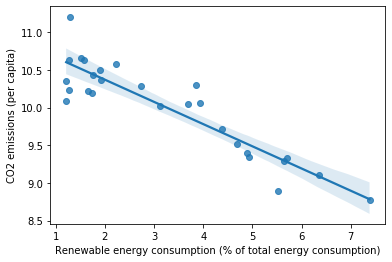

In [13]:
sns.regplot(x = "Renewable energy consumption (% of total energy consumption)", y = "CO2 emissions (per capita)", data = netherlands);

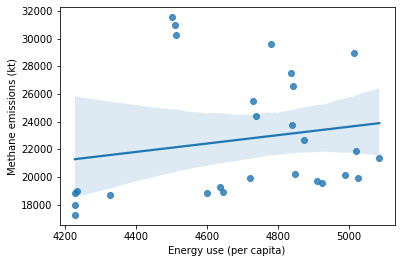

In [14]:
sns.regplot(x = "Energy use (per capita)", y = "Methane emissions (kt)", data = netherlands);

<h2><center> Perform analysis - Do climate change mentionings result in actions? </center></h2>

In this case, we check the following:

* Which countries mention the most climate change-related topics over time? What’s the correlation between these countries’ frequency of climate change-related mentions and their actual impact on the climate? 

In [15]:
# join two datasets
alldatasetjoint = df_speech.join(climate).dropna()
alldatasetjoint

,,Session,Year,Country Code,Speech,word frequency,CO2 emissions (kt),CO2 emissions (per capita),Electric consumption (per capita),Energy use (per capita),Methane emissions (kt),Nitrous emissions (tons),Population grown (annual),Total population,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total energy consumption),Greenhouse gas emissions (kt)
Country Code,Year,,,,,,,,,,,,,,,,
AFG,1992,47,1992,AFG,I shall read out the following statement\r\non...,1,1430.0,0.098719,0.000000,0.000000,8990.0,3200.0,8.546107,14485543.0,67.994310,26.521629,13630.0
AGO,1992,47,1992,AGO,"Allow me, first of all, on behalf \nof the Ang...",0,6370.0,0.503264,53.486663,478.585781,21470.0,15320.0,3.280272,12657361.0,88.701162,72.723283,43170.0
ALB,1992,47,1992,ALB,It is an honour \nand a particular pleasure fo...,0,2240.0,0.689859,453.644074,418.286630,3500.0,1130.0,-0.606435,3247039.0,95.050088,46.813329,6890.0
ARE,1992,47,1992,ARE,"It gives me great pleasure, on behalf of the d...",3,59640.0,29.051699,8284.410480,10890.462333,12350.0,1780.0,5.802706,2052892.0,0.000000,0.188369,74820.0
ARG,1992,47,1992,ARG,I should \nlike to congratulate the President ...,3,107350.0,3.201675,1410.377544,1489.347860,107470.0,36100.0,1.352158,33529320.0,34.870528,9.471650,252410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,2018,73,2018,WSM,I have had the privilege of addressing the G...,23,320.0,1.631588,0.000000,0.000000,300.0,60.0,0.393373,196128.0,0.000000,36.618599,690.0
YEM,2018,73,2018,YEM,On behalf of the Government and the people of ...,2,9310.0,0.326682,0.000000,0.000000,8590.0,3430.0,2.357044,28498683.0,0.000000,4.269000,21760.0
ZAF,2018,73,2018,ZAF,I have the honour to address the General Assem...,3,433250.0,7.496645,0.000000,0.000000,45140.0,18820.0,1.363703,57792520.0,0.000000,10.343300,513440.0


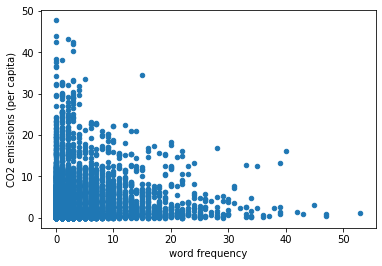

In [16]:
alldatasetjoint.plot.scatter(x = "word frequency", y = "CO2 emissions (per capita)")

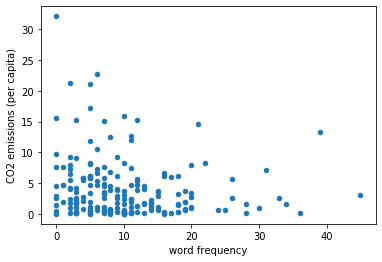

In [17]:
alldatasetjoint.loc(axis=0)[:,2016].plot.scatter(x="word frequency",y="CO2 emissions (per capita)")

In [18]:
alldatasetjoint["word frequency"].groupby("Country Code").sum().sort_values(ascending=False).head(5)

# FSM: Micronesia
# MDG: Madagascar
# TUV: Tuvalu

Country Code
FSM    496
MDG    485
TUV    446
WSM    347
DMA    344
Name: word frequency, dtype: int64

C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


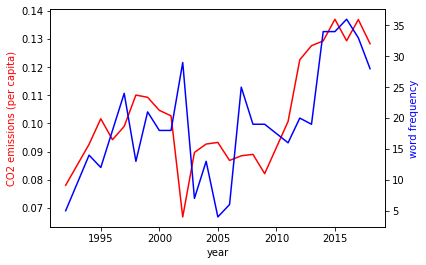

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(alldatasetjoint.loc["MDG"]["Year"],alldatasetjoint.loc["MDG"]["CO2 emissions (per capita)"], c="r")
ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emissions (per capita)", c="r")
ax2 = ax1.twinx()
ax2.plot(alldatasetjoint.loc["MDG"]["Year"],alldatasetjoint.loc["MDG"]["word frequency"], c="b");
ax2.set_ylabel("word frequency", c="b")
plt.show()

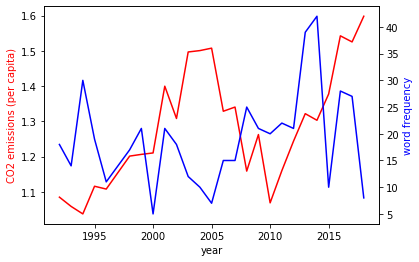

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(alldatasetjoint.loc["FSM"]["Year"],alldatasetjoint.loc["FSM"]["CO2 emissions (per capita)"], c="r")
ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emissions (per capita)", c="r")
ax2 = ax1.twinx()
ax2.plot(alldatasetjoint.loc["FSM"]["Year"],alldatasetjoint.loc["FSM"]["word frequency"], c="b");
ax2.set_ylabel("word frequency", c="b")
plt.show()

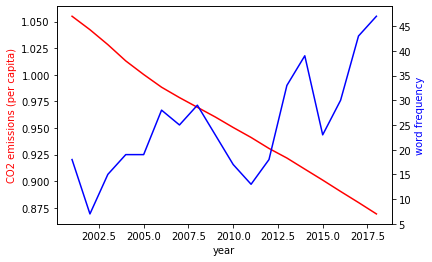

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(alldatasetjoint.loc["TUV"]["Year"],alldatasetjoint.loc["TUV"]["CO2 emissions (per capita)"], c="r")
ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emissions (per capita)", c="r")
ax2 = ax1.twinx()
ax2.plot(alldatasetjoint.loc["TUV"]["Year"],alldatasetjoint.loc["TUV"]["word frequency"], c="b");
ax2.set_ylabel("word frequency", c="b")
plt.show()

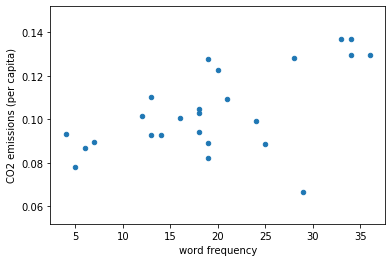

In [22]:
alldatasetjoint.loc["MDG"].plot.scatter(x="word frequency",y="CO2 emissions (per capita)")

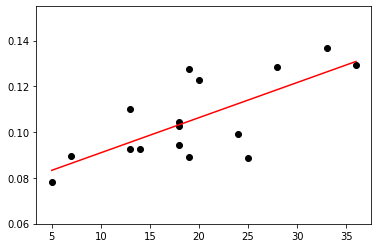

In [23]:
model_dataset = alldatasetjoint.loc["MDG"]

# delete the outlier
model_dataset = model_dataset[model_dataset["CO2 emissions (per capita)"] > 0.07]

X = model_dataset["word frequency"].values
Y = model_dataset["CO2 emissions (per capita)"].values

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=99)

# fit the model
polymodel = make_pipeline(PolynomialFeatures(1), LinearRegression(fit_intercept=True,normalize=True))
polymodel.fit(Xtrain[:, np.newaxis], Ytrain)

# plot
xfit = np.linspace(min(Xtrain), max(Xtrain), 1000)
yfit = polymodel.predict(xfit[:, np.newaxis])
plt.scatter(Xtrain,Ytrain, c='black')
plt.plot(xfit, yfit, c='red');

In [24]:
# Evaluate 
from sklearn.metrics import mean_squared_error, r2_score

YPredictionTest = polymodel.predict(Xtest[:, np.newaxis])
# The mean squared error
print("Mean squared error - Test: %.2f" % mean_squared_error(Ytest, YPredictionTest))
# Explained variance score: 1 is perfect prediction
print('Variance score - Test: %.2f' % r2_score(Ytest, YPredictionTest))

Mean squared error - Test: 0.00
Variance score - Test: 0.70


In [25]:
# Grid Search

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

model = make_pipeline(PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(model, param_grid, cv=7)
grid.fit(Xtrain[:, np.newaxis], Ytrain);

grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 1}

* Is there a correlation between the topics discussed in a nation's speech and its sustainability plans? 

Based on the correlation plot below, there is not much of a correlation between the word frequency and the renewable electricity output from each country (renewable energy output (% of total electricity output)). 

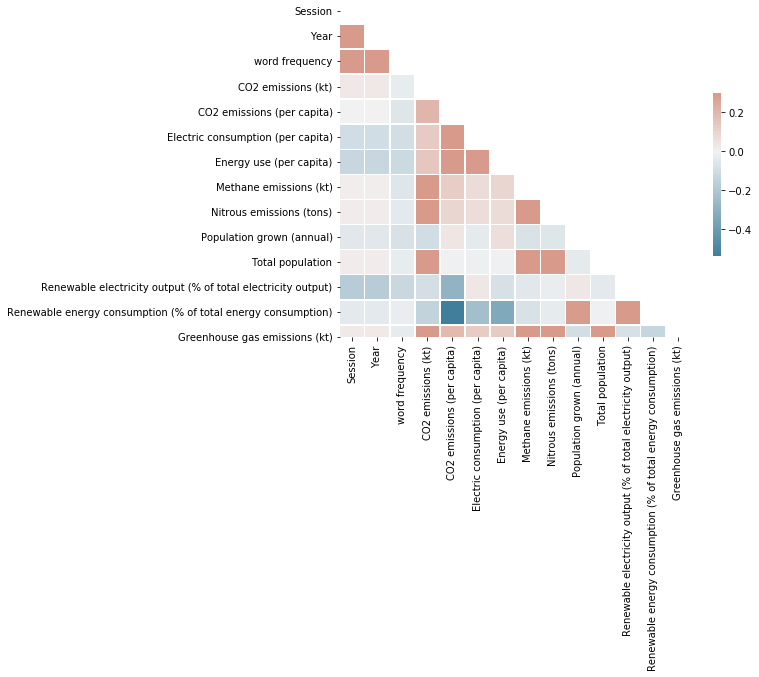

In [26]:
# Compute the correlation matrix
corr = alldatasetjoint.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corplot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig = corplot.get_figure()
fig.savefig("corrplot.png") 

In [27]:
corr

,Session,Year,word frequency,CO2 emissions (kt),CO2 emissions (per capita),Electric consumption (per capita),Energy use (per capita),Methane emissions (kt),Nitrous emissions (tons),Population grown (annual),Total population,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total energy consumption),Greenhouse gas emissions (kt)
Session,1.000000,1.000000,0.434771,0.029834,0.002688,-0.094272,-0.122572,0.012821,0.016327,-0.046690,0.017691,-0.173264,-0.039395,0.028436
Year,1.000000,1.000000,0.434771,0.029834,0.002688,-0.094272,-0.122572,0.012821,0.016327,-0.046690,0.017691,-0.173264,-0.039395,0.028436
word frequency,0.434771,0.434771,1.000000,-0.027774,-0.057312,-0.090463,-0.117910,-0.055204,-0.037785,-0.077537,-0.029604,-0.120648,-0.026400,-0.032542
CO2 emissions (kt),0.029834,0.029834,-0.027774,1.000000,0.200004,0.135533,0.143775,0.833554,0.886957,-0.092781,0.713409,-0.087500,-0.138226,0.995601
CO2 emissions (per capita),0.002688,0.002688,-0.057312,0.200004,1.000000,0.628127,0.808824,0.123001,0.093315,0.042096,-0.006234,-0.286421,-0.536275,0.188937
Electric consumption (per capita),-0.094272,-0.094272,-0.090463,0.135533,0.628127,1.000000,0.850426,0.071375,0.069912,-0.035278,-0.013176,0.034283,-0.238670,0.126565
Energy use (per capita),-0.122572,-0.122572,-0.117910,0.143775,0.808824,0.850426,1.000000,0.091785,0.072356,0.061568,-0.009986,-0.084909,-0.334145,0.136330
Methane emissions (kt),0.012821,0.012821,-0.055204,0.833554,0.123001,0.071375,0.091785,1.000000,0.900855,-0.073808,0.821250,-0.047729,-0.078797,0.880654
Nitrous emissions (tons),0.016327,0.016327,-0.037785,0.886957,0.093315,0.069912,0.072356,0.900855,1.000000,-0.053209,0.882178,-0.020489,-0.032924,0.916186
Population grown (annual),-0.046690,-0.046690,-0.077537,-0.092781,0.042096,-0.035278,0.061568,-0.073808,-0.053209,1.000000,-0.035019,0.036596,0.289046,-0.090249


Below a scatter plot is graphed on the whole dataset when both columns are plotted against each other. From the scatter plot below, it also cannot be derived if there is a (positive or negative) linear relationship between the two columns.

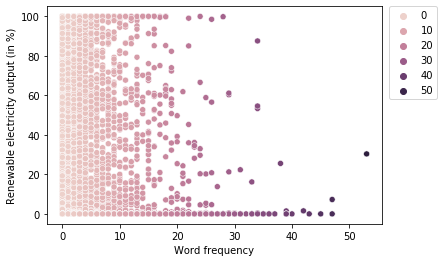

In [28]:
ax = sns.scatterplot(data = alldatasetjoint, x = "word frequency", y = "Renewable electricity output (% of total electricity output)", hue = "word frequency")
ax.set(xlabel='Word frequency', ylabel='Renewable electricity output (in %)')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
plt.show()

The vast majority of the countries are picking up sustainable initiatives without emphasizing it too much during the debates. It can also be noticed that some of the countries that mention it a lot during the speeches, do not produce any form of renewable energy at all.

When subsetting it on the latest year where Renewable electricity output data is available for most of the countries, in this case 2015, it does not show much of a pattern as well.

In [29]:
alldatasetjoint_2015 = alldatasetjoint.loc(axis=0)[:, 2015].sort_values(by = ['Renewable electricity output (% of total electricity output)'])
alldatasetjoint_2015

,,Session,Year,Country Code,Speech,word frequency,CO2 emissions (kt),CO2 emissions (per capita),Electric consumption (per capita),Energy use (per capita),Methane emissions (kt),Nitrous emissions (tons),Population grown (annual),Total population,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total energy consumption),Greenhouse gas emissions (kt)
Country Code,Year,,,,,,,,,,,,,,,,
GRD,2015,70,2015,GRD,I am pleased to bring our usual warm greetings...,18,270.0,2.463436,0.0,0.0,2000.0,10.0,0.643472,109603.0,0.000000,12.278700,2290.0
LCA,2015,70,2015,LCA,As I address this historic seventieth session ...,6,380.0,2.121353,0.0,0.0,270.0,30.0,0.461060,179131.0,0.000000,11.519600,710.0
LBY,2015,70,2015,LBY,"As the General Assembly gathers this year, we ...",1,53840.0,8.388494,0.0,0.0,25910.0,1890.0,0.880670,6418315.0,0.000000,2.887600,84880.0
LBR,2015,70,2015,LBR,"On this auspicious occasion, the seventieth an...",2,1260.0,0.281739,0.0,0.0,6040.0,1390.0,2.552774,4472229.0,0.000000,83.978203,8910.0
BRB,2015,70,2015,BRB,I would like to begin by congratulating Mr. Mo...,11,1290.0,4.521128,0.0,0.0,2330.0,50.0,0.176093,285327.0,0.000000,3.178300,3770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BTN,2015,70,2015,BTN,"At the outset, I should like to convey to the ...",16,960.0,1.318890,0.0,0.0,870.0,180.0,1.220800,727885.0,99.993546,86.681000,2040.0
PRY,2015,70,2015,PRY,"Seventy years ago, on the still smoking ruins ...",5,6370.0,0.952346,0.0,0.0,29620.0,10070.0,1.342889,6688746.0,99.998206,60.512402,47310.0
NPL,2015,70,2015,NPL,I bring with me the warm greetings of the peop...,6,6460.0,0.239126,0.0,0.0,29430.0,7730.0,0.404485,27015033.0,100.000000,85.036102,43670.0


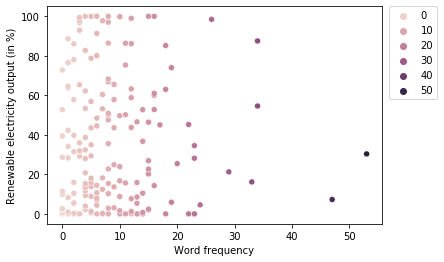

In [30]:
ax = sns.scatterplot(data = alldatasetjoint_2015, x = "word frequency", y = "Renewable electricity output (% of total electricity output)", hue = "word frequency")
ax.set(xlabel='Word frequency', ylabel='Renewable electricity output (in %)')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
plt.show()

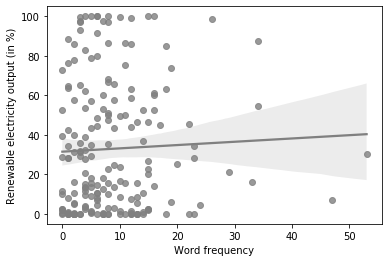

In [31]:
ax = sns.regplot(x = "word frequency", y = "Renewable electricity output (% of total electricity output)", data = alldatasetjoint_2015, color = "grey");
ax.set(xlabel='Word frequency', ylabel='Renewable electricity output (in %)')
plt.show()

Based on the findings above, the conclusion can be made that there is no correlation between the mentions of sustainable plans and their actual action to create renewable energy.

It seems like that countries who have incorporated some mentions related to sustainability and climate change in their speeches, do not result in an increased output of renewable energy.

* What is the correlation between a country's frequency of climate change-related mentions during the UNGA and their change in CO2 emissions? 

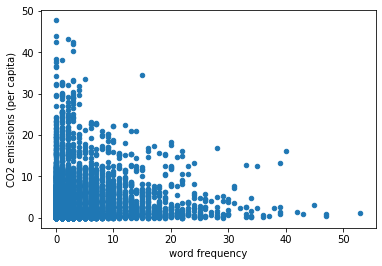

In [32]:
alldatasetjoint.plot.scatter(x="word frequency",y="CO2 emissions (per capita)")

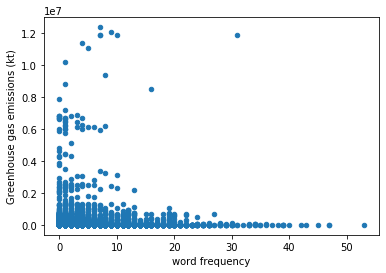

In [33]:
alldatasetjoint.plot.scatter(x="word frequency",y="Greenhouse gas emissions (kt)") 